### 인공 신경망

In [1]:
# 패션 MNIST 데이터 셋
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
print(train_input.shape, train_target.shape) # 60000개의 이미지(28 * 28 크기)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape) # 60000개의 원소가 있는 1차원 배열

(10000, 28, 28) (10000,)


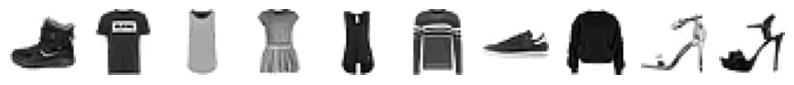

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()

print([train_target[i] for i in range(10)])

In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#### 로지스틱 회귀로 패션 아이템 분류(확률적 경사하강법 이용 -> SGDClassifier)

In [7]:
train_scaled = train_input / 255 # 0 ~ 255 사이의 픽셀값을 255로 나누어 정규화함
train_scaled = train_scaled.reshape(-1, 28 * 28)

print(train_scaled.shape) # 784개의 픽셀로 이루어진 60000개의 샘플

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

print(np.mean(scores['test_score']))

0.8192833333333333


#### 인공 신경망
![](../image/인공신경망.jpg)

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [10]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,)) 
# 10 : 뉴런 개수, 10개의 패션 아이템 분류
# activation : 뉴런의 출력에 적용할 함수, 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해 소프트맥스 함수 사용 
# input_shape : 입력의 크기

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model = keras.Sequential([dense])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

##### 인공 신경망으로 패션 아이템 분류하기

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# 이진 분류 크로스엔트로피 : binary_crossentropy
# 다중 분류 크로스엔트로피 : categorical_crossentropy

In [13]:
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.7385 - loss: 0.7752
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8353 - loss: 0.4868
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.8449 - loss: 0.4558
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8529 - loss: 0.4385
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.8543 - loss: 0.4309
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.8578 - loss: 0.4243
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.8567 - loss: 0.4216
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.8602 - loss: 0.4111
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.8573 - loss: 0.4205
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.8605 - loss: 0.4089


In [14]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8502 - loss: 0.4258


[0.4319756329059601, 0.8525833487510681]

![](../image/사이킷런,%20케라스.jpg)

### 심층 신경망

In [15]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [16]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

은닉층 : 입력층과 출력층 사이의 모든 층
- 출력층에 적용되는 활성화 함수는 종류가 제한
    - 이진 분류 : 시그모이드
    - 다중 분류 : 소프트맥스
- 은닉층은 비교적 자유로움
    - 시그모이드
    - 렐루

은닉층에 활성화 함수 적용 이유<br>
$a * 4 + 2 = b$<br>
$b * 3 - 5 = c$<br>
-> $a * 12 + 1 = c$ => b가 사라짐(하는 일이 없음)<br>
<br>
은닉층에서 선형 계산을 적당하게 비선형적으로 비틀어 주어야 함(그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 함)<br>
$a * 4 + 2 = b$<br>
$log(b) = k$<br>
$k * 3 - 5 = c$<br>

In [17]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # 은닉층, 100개의 뉴런을 가진 밀집층
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층, 10개의 클래스를 분류하므로 10개의 뉴런

#### 심층 신경망 만들기

In [18]:
model = keras.Sequential([dense1, dense2]) # 은닉층 ~ 출력층

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

<table>
        <tr><td>Layer : 층</td><td>(샘플 개수, 출력 개수)</td><td>파라미터 개수</td></tr>
</table>
784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축

#### 층을 추가하는 다른 방법

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name='hidden'), 
    keras.layers.Dense(10, activation='softmax', name='output')]
    , name='패션 MNIST 모델')

model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7467 - loss: 0.7782
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8468 - loss: 0.4244
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.8644 - loss: 0.3779
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.8760 - loss: 0.3517
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.8761 - loss: 0.3401


### 신경망 모델 훈련

#### 손실 곡선

In [23]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [25]:
model = model_fn()
model.summary()

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose : 훈련 과정을 표시 여부
# verbose : 1 - 애포크, 진행 막대, 손실 지표
# verbose : 2 - 에포크, 손실 지표
# verbose : 0 - 훈련 과정 안나타냄

In [28]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


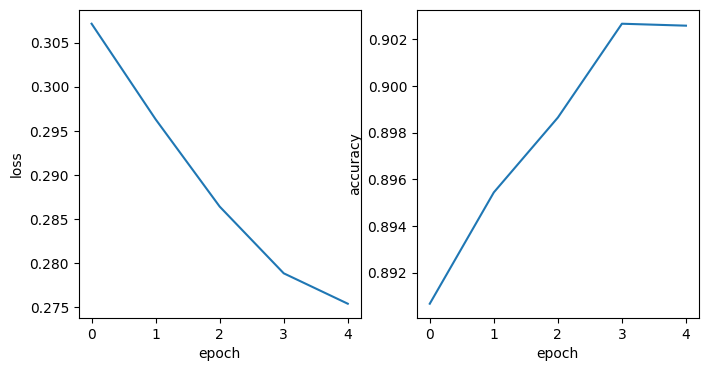

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


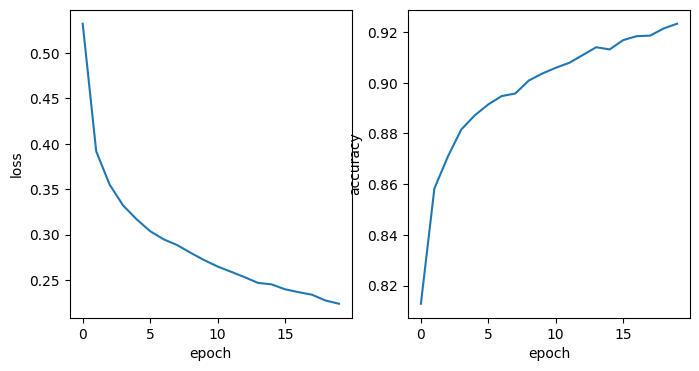

In [33]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### 검증 손실 : 훈련 세트의 손실 + 검증 세트의 손실
※ 인공 신경망은 정확도가 아니라 손실을 최적화함

In [34]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


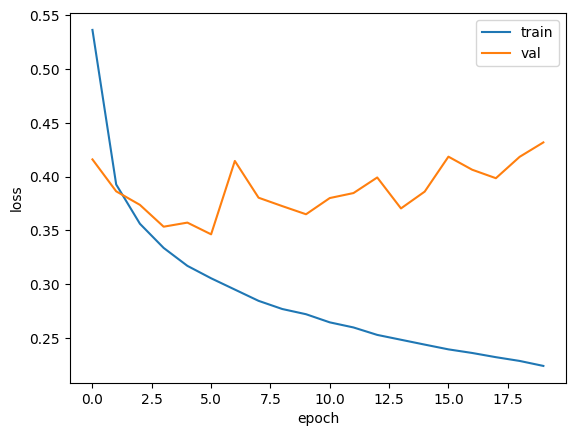

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # 과대적합 모델임(에폭스 5부터 문제)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


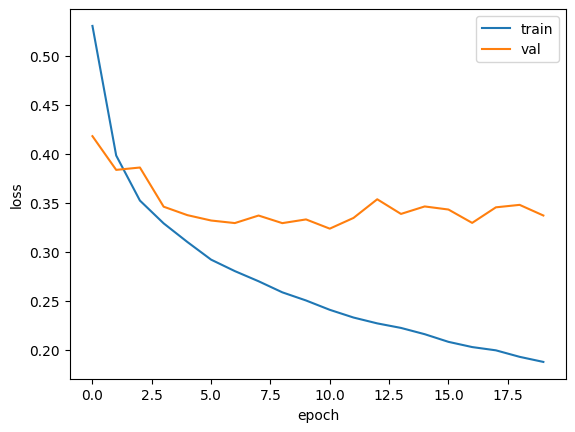

In [ ]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # 그나마 나은 과대적합 모델(에폭스 10부터 문제)

#### 드롭 아웃 : 과대 적합을 막기 위해 일부 뉴런을 off
특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 주의를 기울여야 함 -> 더 안정적인 예측

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


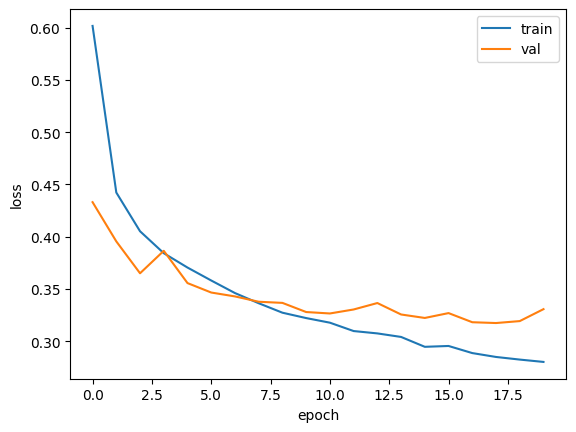

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() # 과대적합이 확실이 줄어듬

#### 모델 저장과 복원

In [49]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save('model-whole.keras') # .keras 확장 파일에 필요한 정보(모델 구조, 파라미터, 옵티마이저 상태)를 모두 압축해 저장

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.save_weights('model.weights.h5') # 파라미터를 HDF5 포맷으로 저장

2가지 비교
- 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
- 아예 model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
# 1. 모델 파라미터만 가져옴
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5') # load_weights()를 사용하려면 save_weights()로 저장했던 모델과 같은 구조를 가져야 함

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=1)
print(np.mean(val_labels == val_target))

233/375 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
0.88375


In [48]:
# 2. 모델을 가져옴
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8842 - loss: 0.3206


[0.32043319940567017, 0.8837500214576721]

#### 콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체(keras.callbacks 패키지의 클래스)
- ModelCheckpoint : 에포크마다 모델 저장(save_best_only=True : 가장 낮은 검증 손실을 만드는 모델)

In [53]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8864 - loss: 0.3182


[0.3196471333503723, 0.8850833177566528]

조기 종료 : 과대적합이 시작되기 전 훈련을 미리 중지(EarlyStopping)
- 매개변수
    - patience = 2 : 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
    - restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

In [55]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
print(early_stopping_cb.stopped_epoch)

8


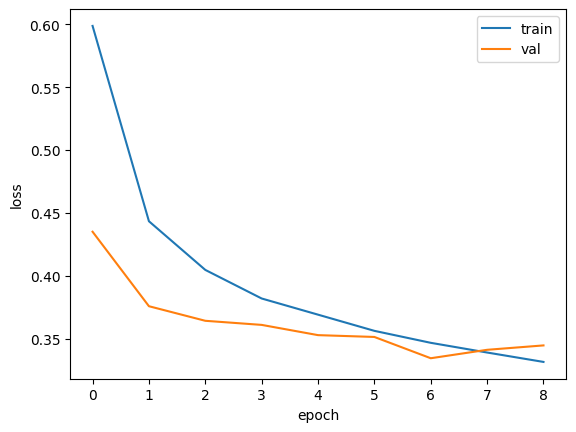

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [58]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8772 - loss: 0.3326


[0.3343675434589386, 0.8777499794960022]